In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
#Carregando e explorando os dados
data = pd.read_csv('../datasets/census.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
#Dividindo a base entre features e label
x = data.iloc[:, 0:14].values
y = data.iloc[:, 14].values

In [8]:
#Transformando as variaveis categóricas em variaveis numéricas
workclass_encoder = LabelEncoder()
education_encoder = LabelEncoder()
marital_encoder = LabelEncoder()
occupation_encoder = LabelEncoder()
relationship_encoder = LabelEncoder()
race_encoder = LabelEncoder()
sex_encoder = LabelEncoder()
country_encoder = LabelEncoder()

x[:, 1] = workclass_encoder.fit_transform(x[:, 1])
x[:, 3] = education_encoder.fit_transform(x[:, 3])
x[:, 5] = marital_encoder.fit_transform(x[:, 5])
x[:, 6] = occupation_encoder.fit_transform(x[:, 6])
x[:, 7] = relationship_encoder.fit_transform(x[:, 7])
x[:, 8] = race_encoder.fit_transform(x[:, 8])
x[:, 9] = sex_encoder.fit_transform(x[:, 9])
x[:, 13] = country_encoder.fit_transform(x[:, 13])

In [9]:
#Patronizando as features com o OneHotEncoder
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
x = onehotencoder_census.fit_transform(x).toarray()
x.shape

(32561, 108)

In [10]:
#Dividindo a base entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [11]:
#Criando e treinando o modelo
census_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
census_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
#Testando o modelo e visualizando as métricas
predict = census_tree.predict(x_test)
predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [13]:
accuracy_score(y_test, predict)

0.8167860798362334

0.8167860798362334

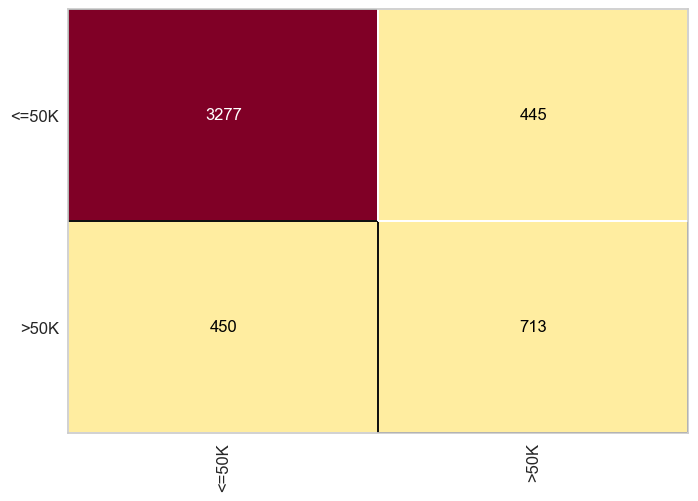

In [14]:
cm = ConfusionMatrix(census_tree)
cm.fit(x_test, y_test)
cm.score(x_test, y_test)

In [15]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      3722
        >50K       0.62      0.61      0.61      1163

    accuracy                           0.82      4885
   macro avg       0.75      0.75      0.75      4885
weighted avg       0.82      0.82      0.82      4885

